[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_yolov5.ipynb)

## 0. Preperation

- Install latest version of SAHI and YOLOv5:

In [1]:
!pip install -U torch sahi yolov5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.5/953.5 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 903.1/903.1 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 7.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=0907cc9963208f4a5ecf86e3c75bc97b699663862944131a7bd05e1a598313cb
  Stored in dir

In [2]:
import os
os.getcwd()

'/content'

- Import required modules:

In [3]:
# arrange an instance segmentation model for test
from sahi.utils.yolov5 import (
    download_yolov5s6_model,
)

# import required functions, classes
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

- Download a yolov5 model and two test images:

In [4]:
# download YOLOV5S6 model to 'models/yolov5s6.pt'
yolov5_model_path = 'models/yolov5s6.pt'
download_yolov5s6_model(destination_path=yolov5_model_path)

# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a YOLOv5 Model

- Instantiate a detection model by defining model weight path and other parameters:

In [5]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov5',
    model_path=yolov5_model_path,
    confidence_threshold=0.3,
    device="cpu", # or 'cuda:0'
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [6]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [11]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


- Visualize predicted bounding boxes and masks over the original image:

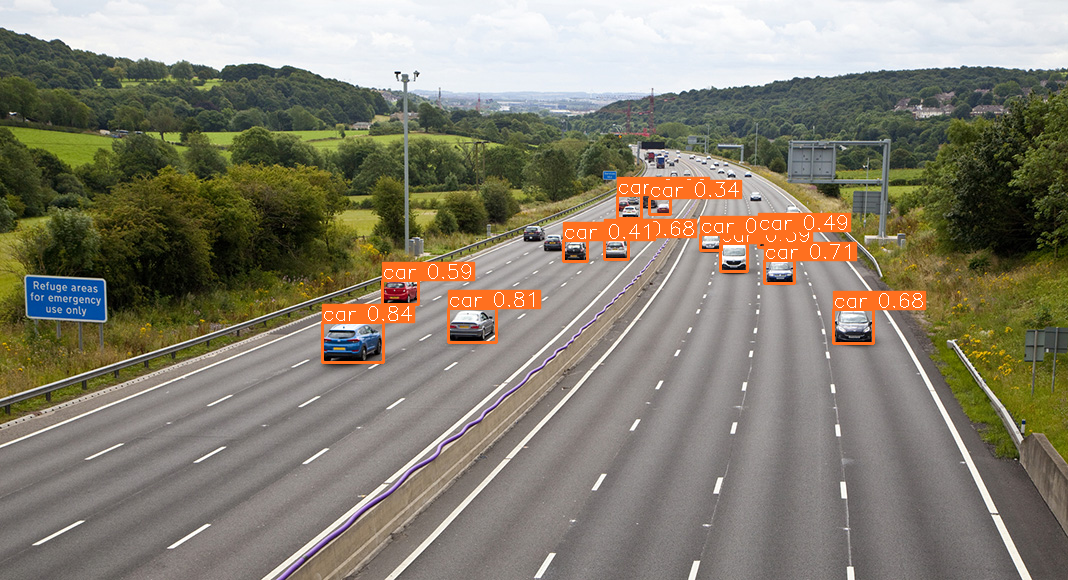

In [12]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a YOLOv5 Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [22]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 slices.


/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast

- Visualize predicted bounding boxes and masks over the original image:

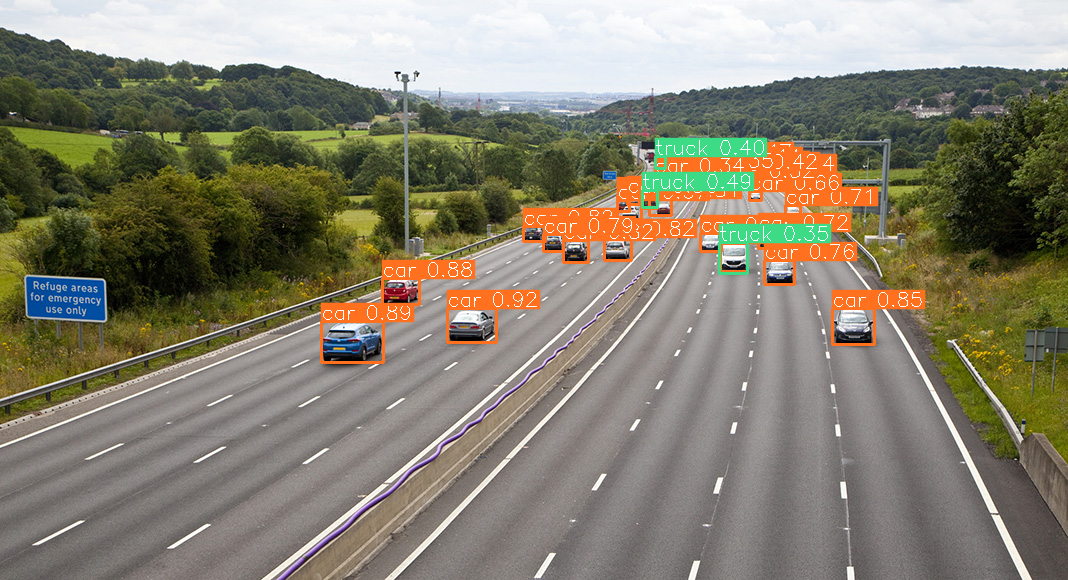

In [23]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [24]:
object_prediction_list = result.object_prediction_list

In [25]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(447.55752182006836, 308.2526626586914, 496.90771484375, 342.8026123046875), w: 49.35019302368164, h: 34.549949645996094>,
    mask: None,
    score: PredictionScore: <value: 0.9154347777366638>,
    category: Category: <id: 2, name: car>>

In [26]:
len(object_prediction_list)

33

In [27]:
object_prediction_list[0].bbox

BoundingBox: <(447.55752182006836, 308.2526626586914, 496.90771484375, 342.8026123046875), w: 49.35019302368164, h: 34.549949645996094>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [15]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [322.0134582519531,
   322.1735534667969,
   61.591583251953125,
   40.286376953125],
  'score': 0.8417121171951294,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2481},
 {'image_id': None,
  'bbox': [448.57476806640625,
   308.7998962402344,
   48.33294677734375,
   34.002716064453125],
  'score': 0.8121787309646606,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1643},
 {'image_id': None,
  'bbox': [764.9083862304688,
   260.927490234375,
   29.15228271484375,
   22.670074462890625],
  'score': 0.7086093425750732,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 660}]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [16]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [322.0134582519531,
   322.1735534667969,
   61.591583251953125,
   40.286376953125],
  'score': 0.8417121171951294,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2481},
 {'image_id': 1,
  'bbox': [448.57476806640625,
   308.7998962402344,
   48.33294677734375,
   34.002716064453125],
  'score': 0.8121787309646606,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1643},
 {'image_id': 1,
  'bbox': [764.9083862304688,
   260.927490234375,
   29.15228271484375,
   22.670074462890625],
  'score': 0.7086093425750732,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 660}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [17]:
result.to_imantics_annotations()[:3]

ImportError: Please run "pip install -U imantics" to install imantics first for imantics conversion.

- ObjectPrediction's can be converted to [fiftyone](https://github.com/voxel51/fiftyone) detection format:

In [18]:
result.to_fiftyone_detections()[:3]

ImportError: Please run "pip install -U fiftyone" to install fiftyone first for fiftyone conversion.

## 4. Batch Prediction

- Set model and directory parameters:

In [19]:
model_type = "yolov5"
model_path = yolov5_model_path
model_device = "cpu" # or 'cuda:0'
model_confidence_threshold = 0.4

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [20]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder: demo_data/


Performing inference on images:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Performing prediction on 15 slices.


/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast

Prediction time is: 8649.07 ms
Performing prediction on 15 slices.


/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast

Prediction time is: 6900.80 ms
Performing prediction on 20 slices.


/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast

Prediction time is: 10245.53 ms
Prediction results are successfully exported to runs/predict/exp


## other yolo versions

In [28]:
!pip install supervision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 5.9 MB/s eta 0:00:00


In [30]:
import numpy as np
import supervision as sv
from ultralytics import YOLO

# dataset = sv.DetectionDataset.from_yolo(...)

model = YOLO("yolov8s")
def callback(image: np.ndarray) -> sv.Detections:
    result = model(image)[0]
    return sv.Detections.from_ultralytics(result)

In [36]:
import cv2
image=cv2.imread('demo_data/small-vehicles1.jpeg')
slicer = sv.InferenceSlicer(callback=callback)
detections = slicer(image=image)

prediction_num = len(detections.xyxy)

box_annotator = sv.BoxAnnotator()



SupervisionWarnings: `overlap_ratio_wh` in `InferenceSlicer.__init__` is deprecated and will be removed in `supervision-0.27.0`. Please manually set it to `None` and use `overlap_wh` instead.


0: 640x640 (no detections), 562.1ms
Speed: 8.5ms preprocess, 562.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 cars, 567.8ms
Speed: 4.5ms preprocess, 567.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 22 cars, 4 trucks, 565.9ms
Speed: 4.5ms preprocess, 565.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x608 4 cars, 535.8ms
Speed: 3.7ms preprocess, 535.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 608)

0: 640x96 (no detections), 109.9ms
Speed: 1.1ms preprocess, 109.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 96)

0: 640x640 (no detections), 849.1ms
Speed: 3.9ms preprocess, 849.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 cars, 886.0ms
Speed: 7.9ms preprocess, 886.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 cars, 916.0ms
Speed: 4.8ms preprocess, 916.0ms inference, 2.0ms postp

NameError: name 'labels' is not defined

In [39]:
annotated_frame = box_annotator.annotate(
	scene=image.copy(),
	detections=detections,
	# labels=detections.data['class_name']
)

sv.plot_image(image=annotated_frame, size=(16, 16))

In [33]:
detections

Detections(xyxy=array([[      382.4,      278.99,      418.94,       304.1],
       [      523.1,      225.74,      545.37,      241.28],
       [      563.1,      241.65,      575.84,      261.56],
       [     452.36,      310.14,      492.08,      319.89],
       [     543.42,      234.74,      564.03,      251.22],
       [     749.77,      191.36,      761.64,      201.02],
       [     700.29,      233.55,      721.96,      251.94],
       [     759.54,      231.18,      780.69,      248.81],
       [     784.69,      205.77,      800.44,      220.26],
       [     665.59,      182.48,      676.65,      191.72],
       [      656.5,      203.07,      671.74,      214.87],
       [     604.57,      238.88,      630.66,      259.95],
       [     744.18,      172.16,      751.76,      177.47],
       [     655.35,      155.85,      665.03,      168.93],
       [     724.44,      177.95,      734.41,      185.77],
       [     720.55,      242.69,      747.98,      273.18],
       [

In [37]:
detections.data['class_name']

array(['car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'truck', 'car', 'truck', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'truck', 'car', 'car', 'truck', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car'], dtype='<U5')

## sahi yolov8

In [5]:
!pip install sympy --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 53.8 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu121 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.13.3 which is incompatible.


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from sahi.predict import predict

# # Set your model and config paths
# model_path = "path/to/your/model/best.pt"
# model_config_path = "path/to/your/config/args_for_sahi.yaml"  # agnostic_nms=True in this file

# # Set your images directory
# images_dir = "/path/to/your/images/"

# # Run SAHI's predict function with the necessary parameters
# predict(
#     model_type="yolov8",
#     model_path=model_path,
#     model_config_path=model_config_path,
#     model_device="cuda:0",  # or "cpu"
#     model_confidence_threshold=0.6,
#     postprocess_class_agnostic=True,
#     source=images_dir,
#     slice_height=640,
#     slice_width=640,
#     overlap_height_ratio=0.2,
#     overlap_width_ratio=0.2,
#     # ... other parameters as needed
# )

In [18]:
!git clone https://github.com/ultralytics/ultralytics/
# !pip install sahi ultralytics


In [25]:
# !ffmpeg -i "/content/drive/MyDrive/yolo/videos/The longest traffic jam in history!.mp4" -c:v libx264 -crf 23 -preset fast -c:a aac -b:a 128k "/content/drive/MyDrive/yolo/videos/converted_video.mp4"


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [38]:
!python /content/ultralytics/examples/YOLOv8-SAHI-Inference-Video/yolov8_sahi.py --source "/content/drive/MyDrive/yolo/videos/converted_video.mp4" --save-img \
--weights /content/yolov8n.pt

Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Traceback (most recent call last):
  File "/content/ultralytics/examples/YOLOv8-SAHI-Inference-Video/yolov8_sahi.py", line 106, in <module>
    inference.inference(**vars(inference.parse_opt()))
  File "/content/ultralytics/examples/YOLOv8-SAHI-Inference-Video/yolov8_sahi.py", line 66, in inference
    results = get_sliced_prediction(
  File "/usr/local/lib/python3.10/dist-packages/sahi/predict.py", line 249, in get_sliced_prediction
    prediction_result = get_prediction(
  File "/usr/local/lib/python3.10/dist-packages/sahi/predict.py", line 93, in get_prediction
    detection_model.perform_inference(np.ascontiguousarray(image_as_pil))
  File "/usr/local/lib/python3.10/dist-p

In [ ]:
#

## sahi with image

In [31]:
from sahi import AutoDetectionModel
from sahi.predict import get_sliced_prediction

# Load YOLOv8 model
detection_model = AutoDetectionModel.from_pretrained(
    model_type="yolov8",
    model_path="/content/yolov8n.pt",
    confidence_threshold=0.4,
    device="cuda"  # Use "cpu" if GPU is unavailable
)

# Perform slicing and inference
result = get_sliced_prediction(
    image="/content/drive/MyDrive/yolo/images/los-angeles-1396606_960_720.webp",
    detection_model=detection_model,
    slice_height=512,
    slice_width=512,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2
)

# Save or visualize results
result.export_visuals("outputs")


Performing prediction on 6 slices.


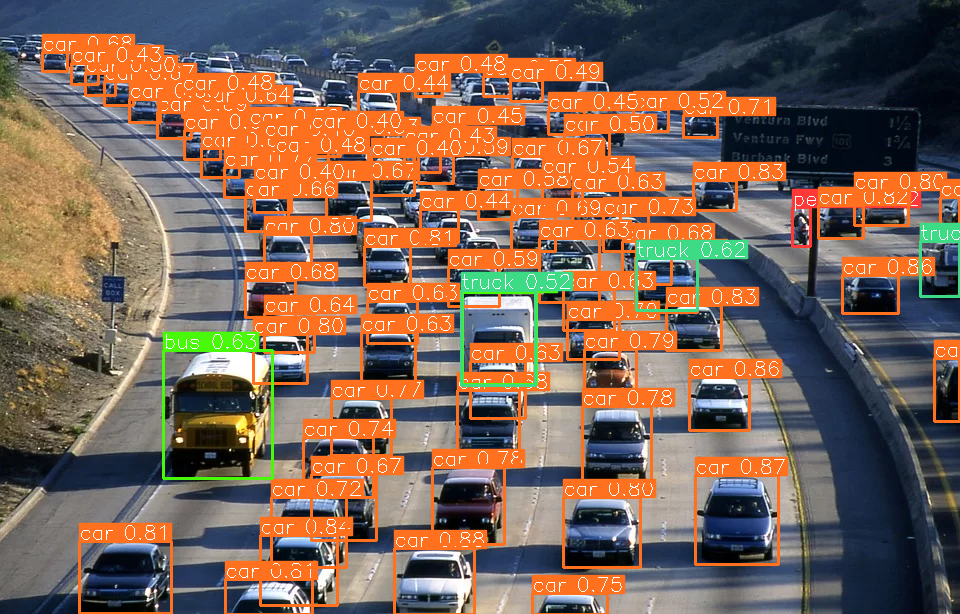

In [32]:
from IPython.display import Image
Image("outputs/prediction_visual.png")

## sahi with video

In [34]:
import cv2
from sahi import AutoDetectionModel
from sahi.predict import get_sliced_prediction

# Load YOLOv8 model with SAHI
detection_model = AutoDetectionModel.from_pretrained(
    model_type="yolov8",
    model_path="/content/yolov8n.pt",  # Path to your YOLOv8 weights
    confidence_threshold=0.4,
    device="cuda"  # Use "cpu" if GPU is unavailable
)

# Define input and output video paths
input_video_path = "/content/drive/MyDrive/yolo/videos/converted_video.mp4"
output_video_path = "/outputs/china_traffic_sahi_output.mp4"

# Open the input video
cap = cv2.VideoCapture(input_video_path)

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Define the video writer for saving processed frames
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Process video frame by frame
frame_number = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    print(f"Processing frame {frame_number + 1}/{frame_count}")
    # Perform slicing and inference on the frame
    result = get_sliced_prediction(
        image=frame,
        detection_model=detection_model,
        slice_height=512,  # Slice height
        slice_width=512,   # Slice width
        overlap_height_ratio=0.2,  # Overlap height ratio
        overlap_width_ratio=0.2    # Overlap width ratio
    )

    # Visualize predictions on the frame
    result_frame = result.visualize()  # Frame with bounding boxes

    # Write the processed frame to the output video
    out.write(result_frame)
    frame_number += 1

# Release resources
cap.release()
out.release()
print("Video processing complete. Saved to:", output_video_path)


Processing frame 1/1796
Performing prediction on 6 slices.


AttributeError: 'PredictionResult' object has no attribute 'visualize'